In [46]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

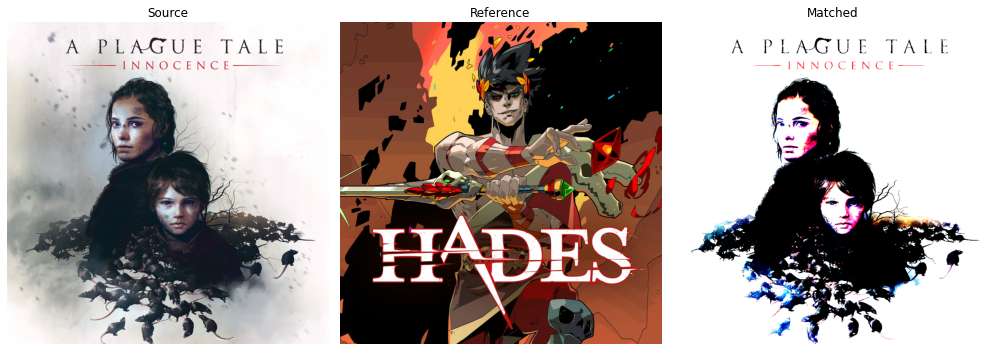

In [47]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [48]:
from collections import Counter

def cdf(img):
  temp = dict(Counter(img.flatten()))
  cdf_values = []
  for i in range(256):
    try:
      cdf_values.append(temp[i])
    except:
      cdf_values.append(0)
  
  plt.plot(cdf_values)
  plt.show()

In [49]:
def channel_matching(src_channel, ref_channel):
  src_colors, src_counts = np.unique(src_channel, return_counts=True)
  src_counts = np.cumsum(src_counts)/(src_channel.shape[0]*src_channel.shape[1])

  ref_colors, ref_counts = np.unique(ref_channel, return_counts=True)
  ref_counts = np.cumsum(ref_counts)/(ref_channel.shape[0]*ref_channel.shape[1])

  color_matches = {}
  for i in range(256):
    c = round(src_counts[i],2)
    color_matches[i] = np.argmin(abs(ref_counts - c))

  return color_matches

In [50]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  
  ### YOUR CODE ###
  # START
  output_image = np.zeros(src_image.shape)
  for i in range(src_image.shape[2]):
    color_matches = channel_matching(src_image[:,:,0], ref_image[:,:,1])
    for j in range(src_image.shape[0]):
      for k in range(src_image.shape[1]):
        output_image[j,k,i] = color_matches[src_image[j,k,i]]
  # END

  return output_image

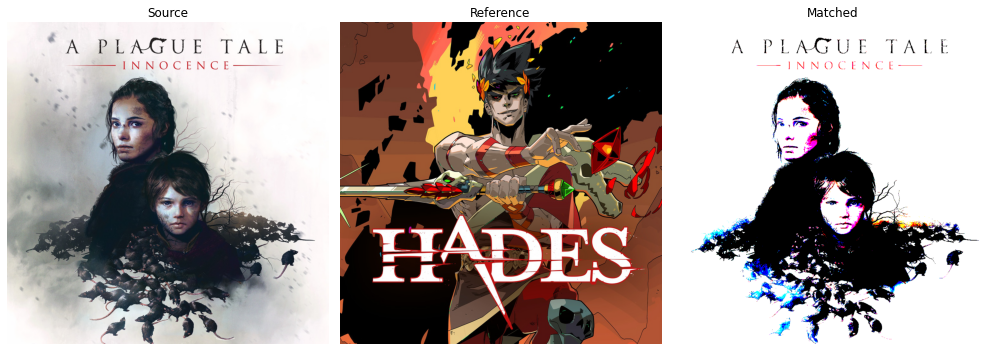

In [51]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

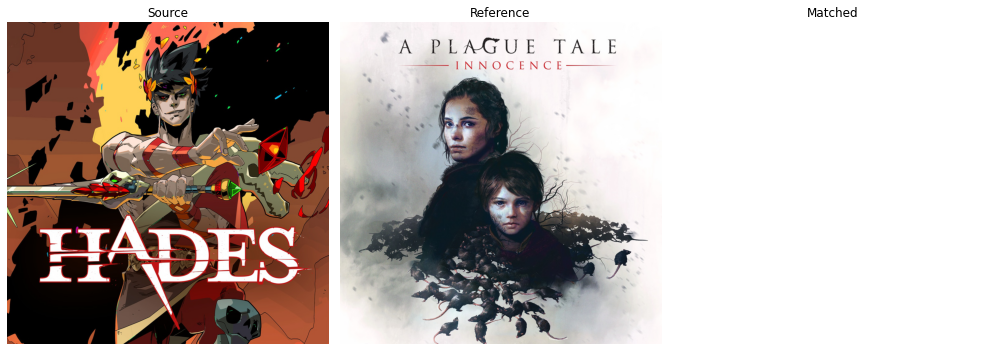

In [52]:
reference = plt.imread('A Plague Tale.jpg')
source = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

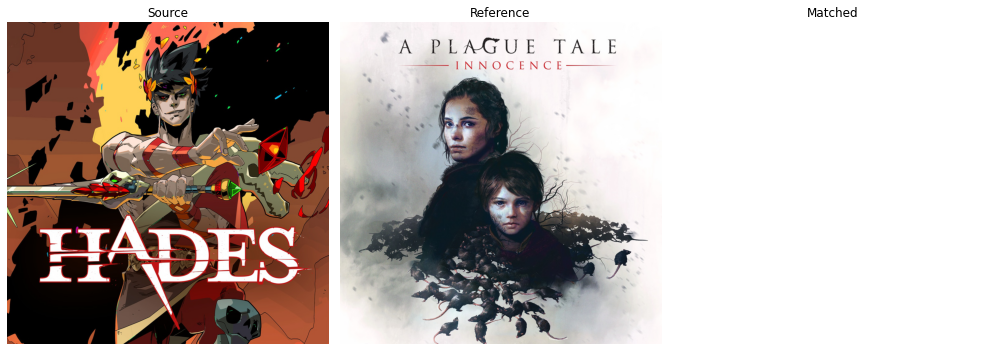

In [63]:
reference = plt.imread('A Plague Tale.jpg')
source = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

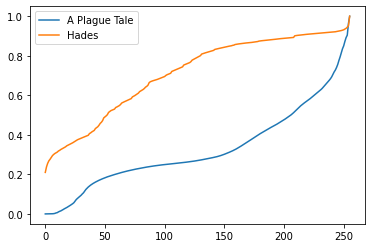

In [65]:
plt.plot(np.cumsum(np.unique(reference, return_counts=True)[1])/(1024*1024*3), label='A Plague Tale')
plt.plot(np.cumsum(np.unique(source, return_counts=True)[1])/(1024*1024*3), label='Hades')
plt.legend()
plt.show()